# Introduction

The National Longitudinal Survey of Youth 1997-2011 dataset is one of the most important databases available to social scientists working with US data. 

It allows scientists to look at the determinants of earnings as well as educational attainment and has incredible relevance for government policy. It can also shed light on politically sensitive issues like how different educational attainment and salaries are for people of different ethnicity, sex, and other factors. When we have a better understanding how these variables affect education and earnings we can also formulate more suitable government policies. 

<center><img src=https://i.imgur.com/cxBpQ3I.png height=400></center>


### Upgrade Plotly

In [1]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


###  Import Statements


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data



In [3]:
df_data = pd.read_csv('NLSY97_subset.csv')
df_schema = pd.read_csv('NLSY97_Variable_Names_and_Descriptions.csv', index_col="Personal variables")

### Understand the Dataset

Have a look at the file entitled `NLSY97_Variable_Names_and_Descriptions.csv`. 

---------------------------

    :Key Variables:  
      1. S           Years of schooling (highest grade completed as of 2011)
      2. EXP         Total out-of-school work experience (years) as of the 2011 interview.
      3. EARNINGS    Current hourly earnings in $ reported at the 2011 interview

In [4]:
df_schema.dropna().head()

Variable Type                                 Description
Personal variables                                                          
FEMALE                         D  Sex of respondent (0 if male, 1 if female)
MALE                           D  Sex of respondent (1 if male, 0 if female)
ETHBLACK                       D                                       Black
ETHHISP                        D                                    Hispanic
ETHWHITE                       D                     Non-black, non-hispanic

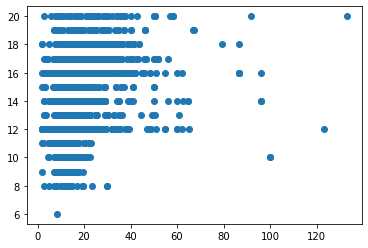

In [5]:
plt.scatter(df_data['EARNINGS'], df_data['S'])

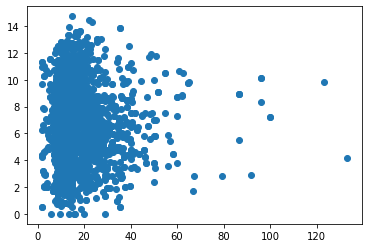

In [6]:
plt.scatter(df_data['EARNINGS'], df_data['EXP'])

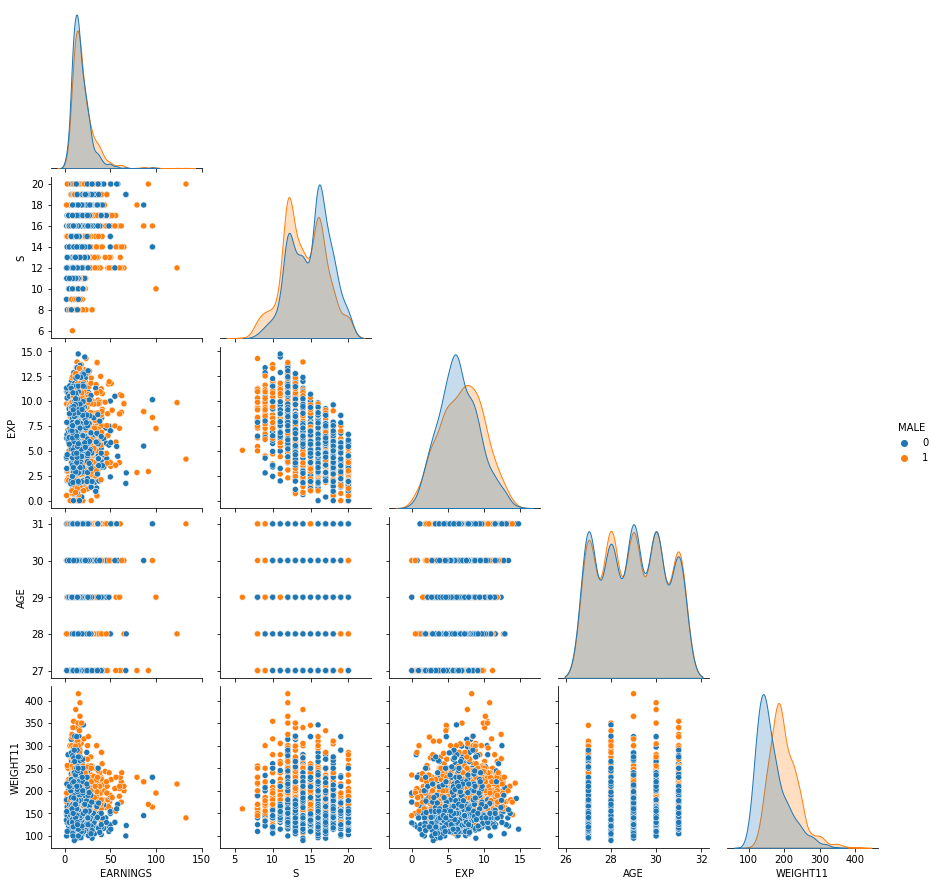

In [20]:
# Change hue value into - MALE(not female) - FAITHN(atheist) - ETHWHITE(not black or hispanic) - SINGLE(not married) - RS97URBN(not rural)
sns.pairplot(df_data, hue="MALE", vars=['EARNINGS','S','EXP','AGE', 'WEIGHT11'], corner=True)
# sns.pairplot(data, kind='reg', plot_kws={'line_kws':{'color': 'cyan'}})
plt.show()

# Preliminary Data Exploration üîé

**Challenge**

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [8]:
df_data.shape

(2000, 96)

In [9]:
df_data.columns

Index(['ID', 'EARNINGS', 'S', 'EXP', 'FEMALE', 'MALE', 'BYEAR', 'AGE',
       'AGEMBTH', 'HHINC97', 'POVRAT97', 'HHBMBF', 'HHBMOF', 'HHOMBF',
       'HHBMONLY', 'HHBFONLY', 'HHOTHER', 'MSA97NO', 'MSA97NCC', 'MSA97CC',
       'MSA97NK', 'ETHBLACK', 'ETHHISP', 'ETHWHITE', 'EDUCPROF', 'EDUCPHD',
       'EDUCMAST', 'EDUCBA', 'EDUCAA', 'EDUCHSD', 'EDUCGED', 'EDUCDO',
       'PRMONM', 'PRMONF', 'PRMSTYUN', 'PRMSTYPE', 'PRMSTYAN', 'PRMSTYAE',
       'PRFSTYUN', 'PRFSTYPE', 'PRFSTYAN', 'PRFSTYAE', 'SINGLE', 'MARRIED',
       'COHABIT', 'OTHSING', 'FAITHN', 'FAITHP', 'FAITHC', 'FAITHJ', 'FAITHO',
       'FAITHM', 'ASVABAR', 'ASVABWK', 'ASVABPC', 'ASVABMK', 'ASVABNO',
       'ASVABCS', 'ASVABC', 'ASVABC4', 'VERBAL', 'ASVABMV', 'HEIGHT',
       'WEIGHT04', 'WEIGHT11', 'SF', 'SM', 'SFR', 'SMR', 'SIBLINGS', 'REG97NE',
       'REG97NC', 'REG97S', 'REG97W', 'RS97RURL', 'RS97URBN', 'RS97UNKN',
       'JOBS', 'HOURS', 'TENURE', 'CATGOV', 'CATPRI', 'CATNPO', 'CATMIS',
       'CATSE', 'COLLBARG', 'URBAN'

In [10]:
print(f'Any NaN values? {df_data.isna().values.any()}')
print(f'Any duplicates? {df_data.duplicated().values.any()}')
print("\n***Number of duplicates:***")
print(len(df_data[df_data.duplicated()]))

Any NaN values? True
Any duplicates? True

***Number of duplicates:***
513


## Data Cleaning - Check for Missing Values and Duplicates

Find and remove any duplicate rows.

In [11]:
df_data = df_data.drop_duplicates()
print(f'Any duplicates? {df_data.duplicated().values.any()}')

Any duplicates? False


## Descriptive Statistics

In [12]:
df_data.describe()

ID  EARNINGS        S      EXP   FEMALE     MALE    BYEAR  \
count 1,487.00  1,487.00 1,487.00 1,487.00 1,487.00 1,487.00 1,487.00   
mean  3,547.13     18.81    14.56     6.70     0.49     0.51 1,982.07   
std   2,009.84     12.00     2.77     2.86     0.50     0.50     1.38   
min       1.00      2.00     6.00     0.00     0.00     0.00 1,980.00   
25%   1,888.00     11.41    12.00     4.65     0.00     0.00 1,981.00   
50%   3,474.00     15.75    15.00     6.63     0.00     1.00 1,982.00   
75%   5,160.50     22.60    16.00     8.71     1.00     1.00 1,983.00   
max   8,980.00    132.89    20.00    14.73     1.00     1.00 1,984.00   

           AGE  AGEMBTH    HHINC97  ...    URBAN    REGNE    REGNC     REGW  \
count 1,487.00 1,453.00   1,205.00  ... 1,487.00 1,487.00 1,487.00 1,487.00   
mean     28.93    26.32  58,310.67  ...     0.78     0.16     0.27     0.34   
std       1.38     5.08  43,868.05  ...     0.43     0.36     0.44     0.47   
min      27.00    12.00       0.00  ...     0.00     0.00     0.00     0.00   
25%      28.00    23.00  32,000.00  ...     1.00     0.00     0.00     0.00   
50%      29.00    26.00  50,500.00  ...     1.00     0.00     0.00     0.00   
75%      30.00    30.00  72,000.00  ...     1.00     0.00     1.00     1.00   
max      31.00    45.00 246,474.00  ...     2.00     1.00     1.00     1.00   

          REGS  MSA11NO  MSA11NCC  MSA11CC  MSA11NK  MSA11NIC  
count 1,487.00 1,487.00  1,487.00 1,487.00 1,487.00  1,487.00  
mean      0.23     0.05      0.54     0.41     0.00      0.00  
std       0.42     0.21      0.50     0.49     0.04      0.00  
min       0.00     0.00      0.00     0.00     0.00      0.00  
25%       0.00     0.00      0.00     0.00     0.00      0.00  
50%       0.00     0.00      1.00     0.00     0.00      0.00  
75%       0.00     0.00      1.00     1.00     0.00      0.00  
max       1.00     1.00      1.00     1.00     1.00      0.00  

[8 rows x 96 columns]

In [13]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1487 entries, 0 to 1995
Data columns (total 96 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1487 non-null   int64  
 1   EARNINGS  1487 non-null   float64
 2   S         1487 non-null   int64  
 3   EXP       1487 non-null   float64
 4   FEMALE    1487 non-null   int64  
 5   MALE      1487 non-null   int64  
 6   BYEAR     1487 non-null   int64  
 7   AGE       1487 non-null   int64  
 8   AGEMBTH   1453 non-null   float64
 9   HHINC97   1205 non-null   float64
 10  POVRAT97  1203 non-null   float64
 11  HHBMBF    1487 non-null   int64  
 12  HHBMOF    1487 non-null   int64  
 13  HHOMBF    1487 non-null   int64  
 14  HHBMONLY  1487 non-null   int64  
 15  HHBFONLY  1487 non-null   int64  
 16  HHOTHER   1487 non-null   int64  
 17  MSA97NO   1487 non-null   int64  
 18  MSA97NCC  1487 non-null   int64  
 19  MSA97CC   1487 non-null   int64  
 20  MSA97NK   1487 non-null   int6

## Visualise the Features

In [14]:
target = df_data['EARNINGS']
features = df_data.drop('EARNINGS', axis=1)

# Split Training & Test Dataset

We *can't* use all the entries in our dataset to train our model. Keep 20% of the data for later as a testing dataset (out-of-sample data).  

In [15]:
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=10)

In [16]:
# % of training set
train_pct = 100*len(X_train)/len(features)
print(f'Training data is {train_pct:.3}% of the total data.')

# % of test data set
test_pct = 100*X_test.shape[0]/features.shape[0]
print(f'Test data makes up the remaining {test_pct:0.3}%.')

Training data is 80.0% of the total data.
Test data makes up the remaining 20.0%.


# Simple Linear Regression

Only use the years of schooling to predict earnings. Use sklearn to run the regression on the training dataset. How high is the r-squared for the regression on the training data? 

In [17]:
regression = LinearRegression()
# Explanatory Variable(s) or Feature(s)
y_train = pd.DataFrame(df_data, columns=['EARNINGS'])
 
# Response Variable or Target
X_train = pd.DataFrame(df_data, columns=['S'])

# Find the best-fit line
regression.fit(X_train, y_train)

# R-squared
print(regression.score(X_train, y_train))

0.07923944586935583


### Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative). 

Interpret the regression. How many extra dollars can one expect to earn for an additional year of schooling?

In [18]:
# Theta zero
print(regression.intercept_)

# Theta one
print(regression.coef_)

[1.03222727]
[[1.22105969]]


In [19]:
years_of_schooling = 19
earning_estimate = 13.33636566 + 0.064894 * years_of_schooling
earning_estimate

14.56935166

### Analyse the Estimated Values & Regression Residuals

How good our regression is also depends on the residuals - the difference between the model's predictions ( ùë¶ÃÇ ùëñ ) and the true values ( ùë¶ùëñ ) inside y_train. Do you see any patterns in the distribution of the residuals?

In [20]:
predicted_vals = regression.predict(X_train)
residuals = (y_train - predicted_vals)

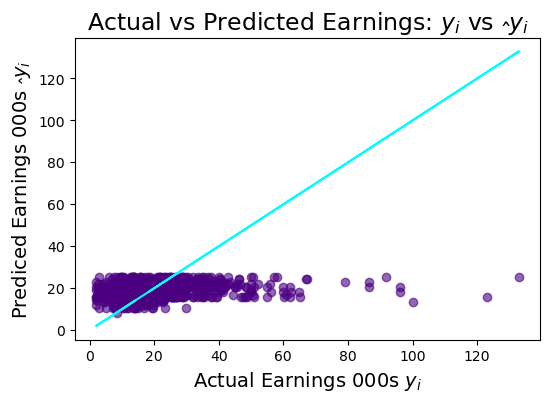

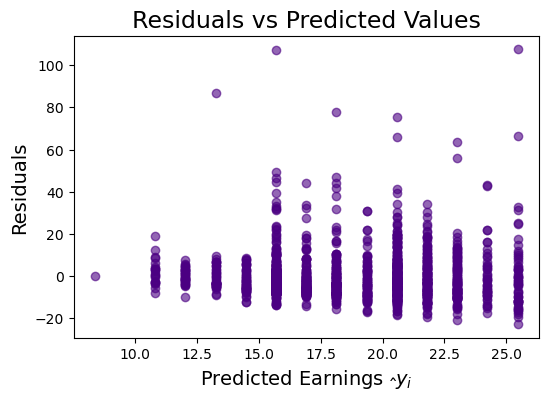

In [21]:
# Original Regression of Actual vs. Predicted Prices
plt.figure(dpi=100)
plt.scatter(x=y_train, y=predicted_vals, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.title(f'Actual vs Predicted Earnings: $y _i$ vs $\hat y_i$', fontsize=17)
plt.xlabel('Actual Earnings 000s $y _i$', fontsize=14)
plt.ylabel('Prediced Earnings 000s $\hat y _i$', fontsize=14)
plt.show()

# Residuals vs Predicted values
plt.figure(dpi=100)
plt.scatter(x=predicted_vals, y=residuals, c='indigo', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted Earnings $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

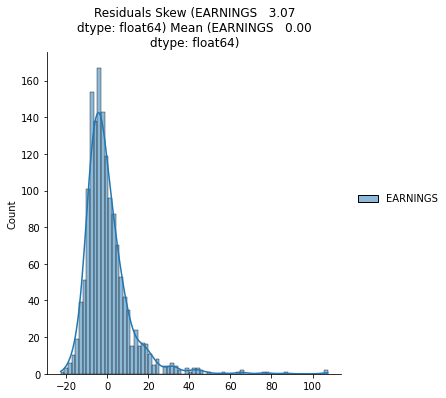

In [22]:
# Residual Distribution Chart
resid_mean = round(residuals.mean(), 2)
resid_skew = round(residuals.skew(), 2)

sns.displot(residuals, kde=True, color='indigo')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

# Multivariable Regression

Now use both years of schooling and the years work experience to predict earnings. How high is the r-squared for the regression on the training data? 

In [23]:
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    target, 
                                                    test_size=0.2, 
                                                    random_state=10)

In [24]:
# Explanatory Variable(s) or Feature(s)
y_train = pd.DataFrame(df_data, columns=['EARNINGS'])
 
# Response Variable or Target
X_train = pd.DataFrame(df_data, columns=['S','EXP'])

In [25]:
regr = LinearRegression()

regr.fit(X_train, y_train)
rsquared = regr.score(X_train, y_train)

print(f'Training data r-squared: {rsquared:.2}')

Training data r-squared: 0.11


### Evaluate the Coefficients of the Model

In [26]:
regr_coef = pd.DataFrame(data=regr.coef_[0], index=X_train.columns, columns=['Coefficient'])
regr_coef

Coefficient
S           1.77
EXP         0.92

In [27]:
# Premium for having an extra room
premium = regr_coef.loc['S'].values[0] * 1000  # i.e., ~3.11 * 1000
print(f'The extra earnings for having an extra year school is ${premium:.5}')

The extra earnings for having an extra year school is $1773.8


### Analyse the Estimated Values & Regression Residuals

In [28]:
predicted_vals = regr.predict(X_train)
residuals = (y_train - predicted_vals)

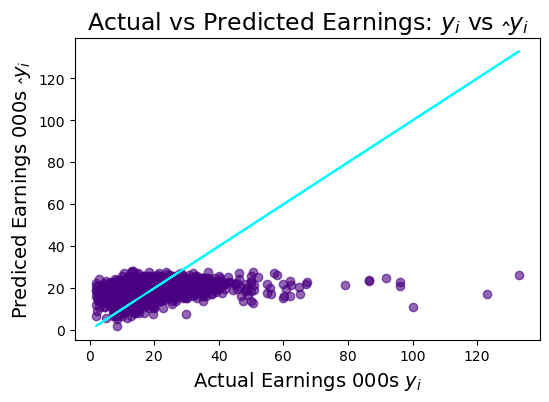

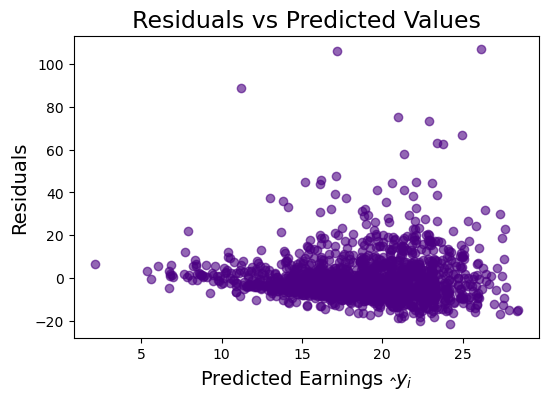

In [29]:
# Original Regression of Actual vs. Predicted Prices
plt.figure(dpi=100)
plt.scatter(x=y_train, y=predicted_vals, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.title(f'Actual vs Predicted Earnings: $y _i$ vs $\hat y_i$', fontsize=17)
plt.xlabel('Actual Earnings 000s $y _i$', fontsize=14)
plt.ylabel('Prediced Earnings 000s $\hat y _i$', fontsize=14)
plt.show()

# Residuals vs Predicted values
plt.figure(dpi=100)
plt.scatter(x=predicted_vals, y=residuals, c='indigo', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted Earnings $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

# Use Your Model to Make a Prediction

How much can someone with a bachelors degree (12 + 4) years of schooling and 5 years work experience expect to earn in 2011?

In [30]:
# Starting Point: Average Values in the Dataset
features = df_data[["S","EXP"]]
average_vals = features.mean().values
earning_stats = pd.DataFrame(data=average_vals.reshape(1, len(features.columns)), 
                              columns=features.columns)
earning_stats

S  EXP
0 14.56 6.70

In [31]:
# Make prediction
estimate = regr.predict(earning_stats)[0]

# Convert Prices to Acutal Dollar Values
dollar_est = estimate * 1000
print(f'The earning is estimated to be ${round(dollar_est[0],2)}')

The earning is estimated to be $18806.98


# Experiment and Investigate Further

Which other features could you consider adding to further improve the regression to better predict earnings? 

<li>Earning is estimated if Sex</li>
<li>Earning is estimated if Ethnicity</li>
<li>Earning is estimated if AGE</li>
<li>Earning is estimated if Category of employment</li>